# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [3]:
cities[:5]

['waitangi', 'enewetak', 'minas de marcona', 'adamstown', 'cabedelo']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []




                         
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
        # Parse the JSON and retrieve data
    response = requests.get(city_url).json()
        
    try:
            
   

     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
          city = response["name"]
          city_lat = response["coord"]["lat"]
          city_lng = response["coord"]["lon"]
          city_max_temp = response["main"]["temp_max"]
          city_humidity = response["main"]["humidity"]
          city_clouds = response["clouds"]["all"]
          city_wind = response["wind"]["speed"]
          city_country = response["sys"]["country"]
          city_date = response["dt"]

        # Append the City information into city_data list
          city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
        
     
        
 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | minas de marcona
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | cabedelo
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | beyneu
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | ginir
Processing Record 14 of Set 1 | sao joao da barra
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | port hedland
Processing Record 22 o

In [11]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_weather_df = pd.DataFrame(city_data)

# Show Record Count
city_weather_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [18]:
# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waitangi,-43.9535,-176.5597,16.01,92,0,0.89,NZ,1707923169
1,Enewetak,11.3474,162.3373,26.26,75,100,10.43,MH,1707923170
2,Minas de Marcona,-15.2119,-75.1103,23.10,66,49,4.37,PE,1707923170
3,Adamstown,-25.0660,-130.1015,24.82,87,86,6.80,PN,1707923170
4,Cabedelo,-6.9811,-34.8339,32.37,66,86,4.46,BR,1707922877


In [22]:
# Export the City_Data into a csv
city_weather_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_weather_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Waitangi,-43.9535,-176.5597,16.01,92,0,0.89,NZ,1707923169
1,Enewetak,11.3474,162.3373,26.26,75,100,10.43,MH,1707923170
2,Minas de Marcona,-15.2119,-75.1103,23.10,66,49,4.37,PE,1707923170
3,Adamstown,-25.0660,-130.1015,24.82,87,86,6.80,PN,1707923170
4,Cabedelo,-6.9811,-34.8339,32.37,66,86,4.46,BR,1707922877


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

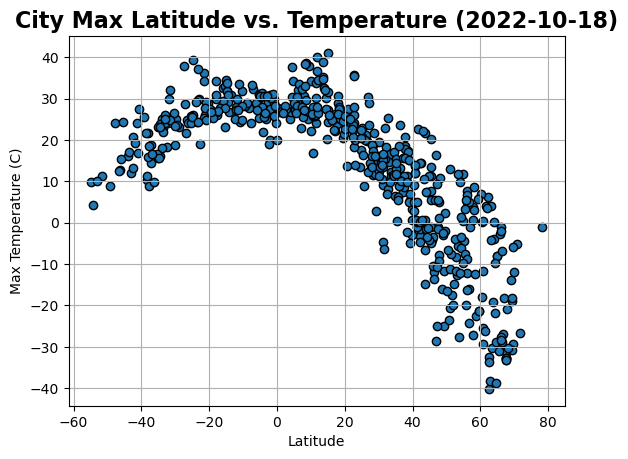

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker = "o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)", fontsize =16, fontweight = "bold")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

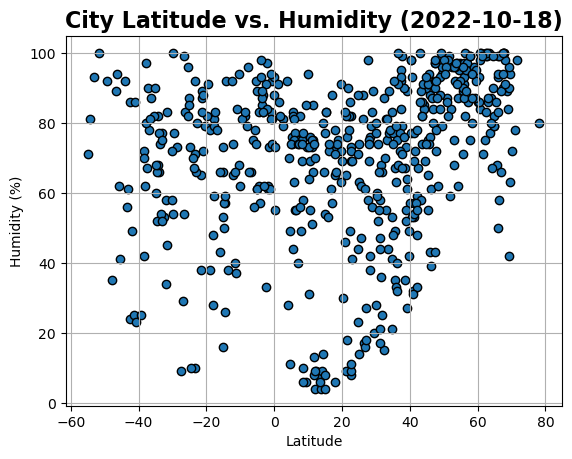

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker = "o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)", fontsize =16, fontweight = "bold")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

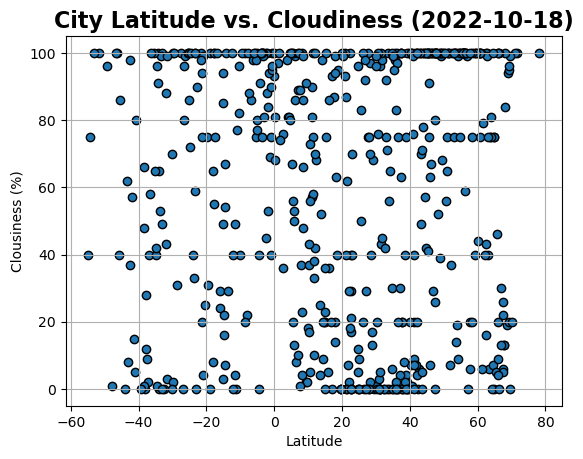

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker = "o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Clousiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)", fontsize =16, fontweight = "bold")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

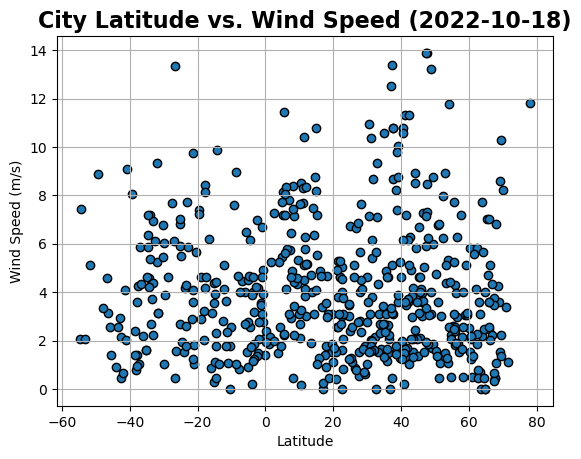

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker = "o", edgecolors="black")


# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)", fontsize =16, fontweight = "bold")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
import scipy.stats as st

In [42]:
# Define a function to create Linear Regression plots
def linear_agression (x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq
   

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_weather_df.loc[city_weather_df["Lat"]>=0]

# Display sample data
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Enewetak,11.3474,162.3373,26.26,75,100,10.43,MH,1707923170
6,Whitehorse,60.7161,-135.0538,-11.57,84,75,2.06,CA,1707923170
7,Beyneu,45.3167,55.2000,11.34,55,100,3.78,KZ,1707923170
8,Ribeira Grande,38.5167,-28.7000,17.22,67,40,8.23,PT,1707923174
11,Saint Paul Harbor,57.7900,-152.4072,3.73,75,20,7.20,US,1707923183


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_weather_df.loc[city_weather_df["Lat"]<0]

# Display sample data
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Waitangi,-43.9535,-176.5597,16.01,92,0,0.89,NZ,1707923169
2,Minas de Marcona,-15.2119,-75.1103,23.10,66,49,4.37,PE,1707923170
3,Adamstown,-25.0660,-130.1015,24.82,87,86,6.80,PN,1707923170
4,Cabedelo,-6.9811,-34.8339,32.37,66,86,4.46,BR,1707922877
5,Port Alfred,-33.5906,26.8910,22.88,74,53,2.68,ZA,1707923170


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : -0.87


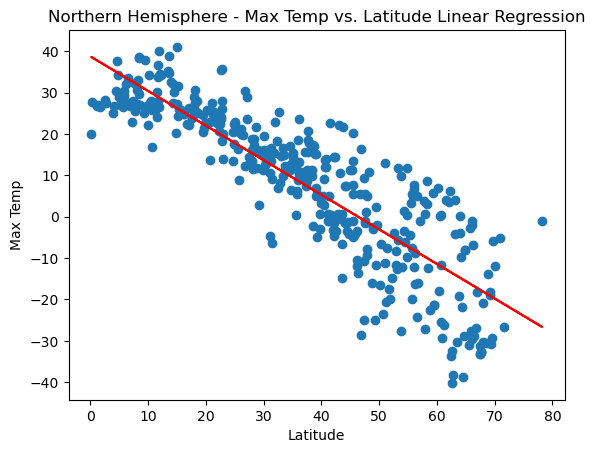

In [47]:
# Linear regression on Northern Hemisphere
equation = linear_agression(northern_hemi["Lat"], northern_hemi["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


The r-squared is : 0.66


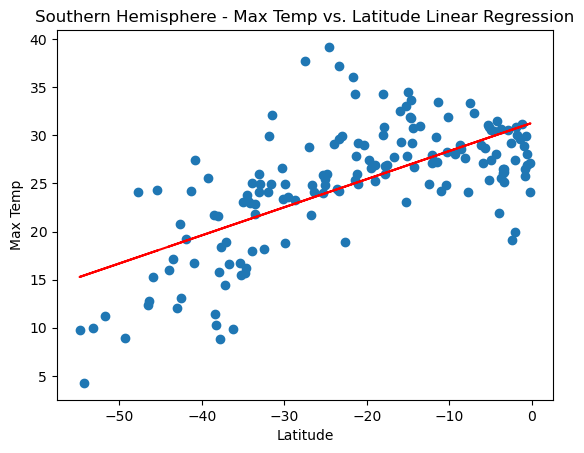

In [48]:
# Linear regression on Southern Hemisphere
equation = linear_agression(southern_hemi["Lat"], southern_hemi["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.46


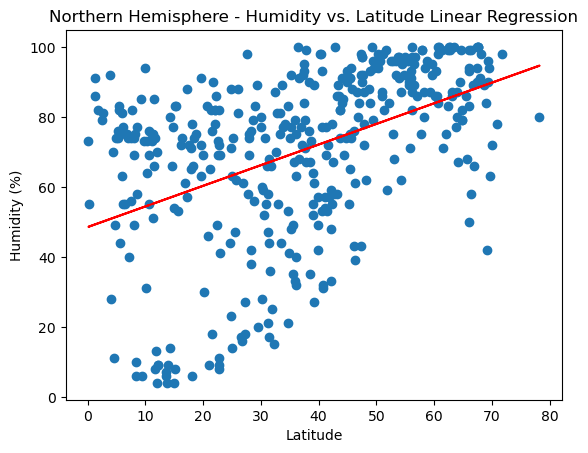

In [49]:
# Northern Hemisphere
equation = linear_agression(northern_hemi["Lat"], northern_hemi["Humidity"])
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


The r-squared is : 0.13


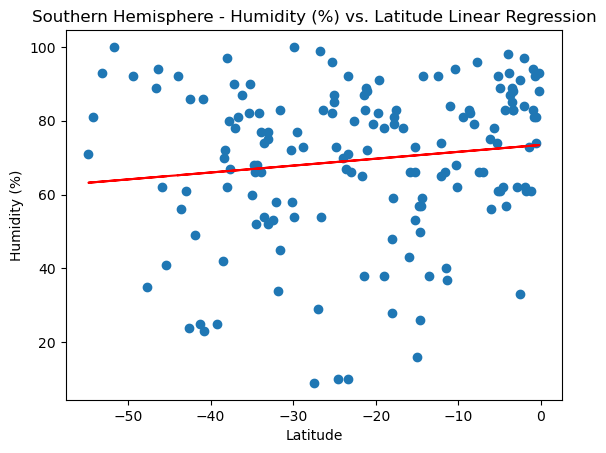

In [50]:
# Southern Hemisphere
equation = linear_agression(southern_hemi["Lat"], southern_hemi["Humidity"])
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.12


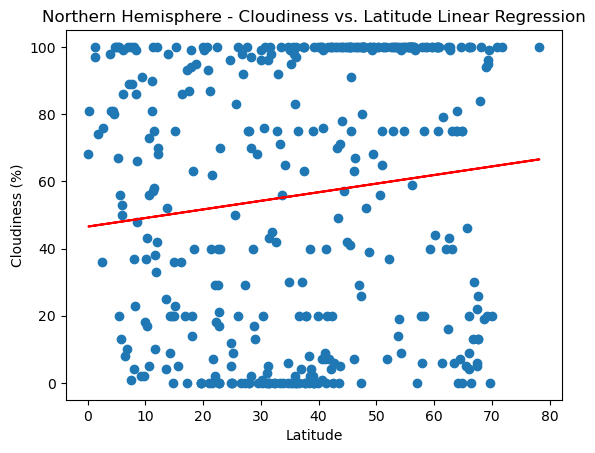

In [51]:
# Northern Hemisphere
equation = linear_agression(northern_hemi["Lat"], northern_hemi["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


The r-squared is : 0.25


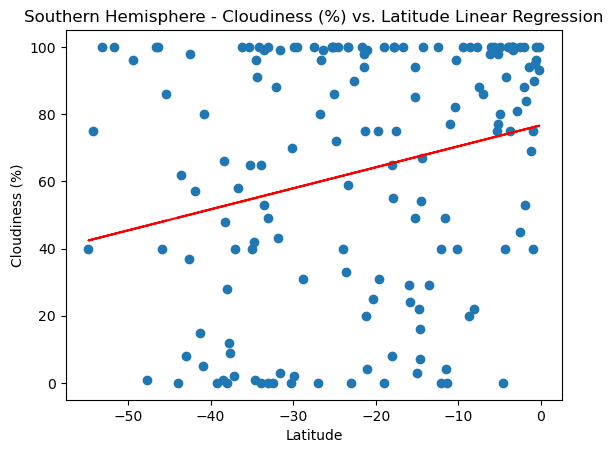

In [52]:
# Southern Hemisphere
equation = linear_agression(southern_hemi["Lat"], southern_hemi["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** There is a positive correlation between the southern hemisphere and cloudiness. As you move closer to the equator, the cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : -0.09


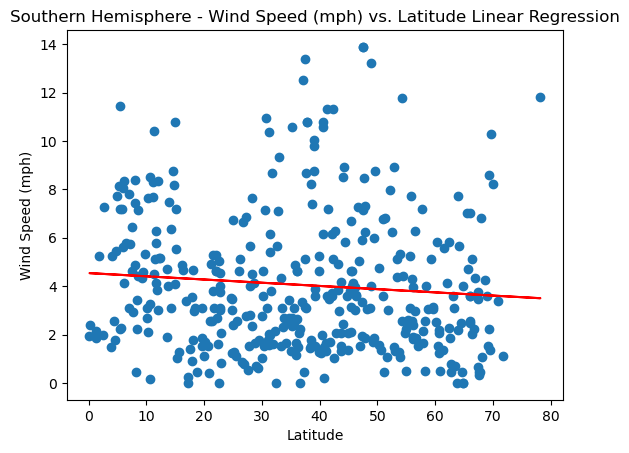

In [53]:
# Northern Hemisphere
equation = linear_agression(northern_hemi["Lat"], northern_hemi["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

The r-squared is : -0.09


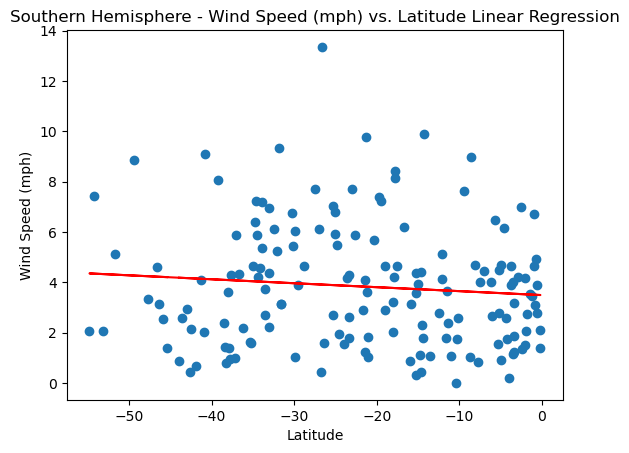

In [54]:
# Southern Hemisphere
equation = linear_agression(southern_hemi["Lat"], southern_hemi["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** There is a slight negative correlation between the southern hemisphere and wind sepeed. As you move closer to the equator, the humidity decreases slightly.